In [1]:
import os
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt

In [2]:
folder_path = '/Users/dada/Desktop/TFM/EARLINET_Database/FINAL_CASES/BCN_12_04_2024/Retrieval_Uncertainty_same_error_VSDs_BCN12thApril2024' 
# folder_path = '/Users/dada/Desktop/TFM/EARLINET_Database/FINAL_CASES/BCN_12_04_2024/Retrieval_Uncertainty_VSDs_BCN12thApril2024'
file_paths = glob.glob(os.path.join(folder_path, "Realization_**.csv"))

In [3]:
vsd_data = {}
vsd_std_data = {}
radii = {}
for file_path in file_paths:
    data = pd.read_csv(file_path, skiprows=1, header=None)  # Skip the first header row
    vsd_data[os.path.basename(file_path)] = data[1] 
    vsd_std_data[os.path.basename(file_path)] = data[2]    # Store the second column as VSD values
    radii[os.path.basename(file_path)] = data[0]  # Store the first column as radii values

# Separate the file 'Realization_01.csv' for plotting and exclude it from standard deviation calculation
# Realization 01 contains data of the initial configuration with the right errors 
# Realization 00 contains data of the initial configuration with errors 0.1
realization_01_vsd = vsd_data.pop('Realization_01.csv', None)  # Remove and store 'Realization_01.csv' VSD mean values data
realization_01_vsd_std = vsd_std_data.pop('Realization_01.csv', None)  # Remove and store 'Realization_01.csv' data VSD STD DATA
realization_00_vsd = vsd_data.pop('Realization_00.csv', None)
realization_00_vsd_std = vsd_std_data.pop('Realization_00.csv', None)

# Combine the remaining VSD data into a single DataFrame for standard deviation calculation
vsd_df = pd.DataFrame(vsd_data)
vsd_std_df = pd.DataFrame(vsd_std_data) 

# Calculate the standard deviation for each row (value) across all remaining files
vsd_std_dev_calculated = vsd_df.std(axis=1)
# Calculate the mean for each row (value) across all remaining files 
vsd_mean_calculated = vsd_df.mean(axis=1)

vsd_std_dev_plus_half = vsd_std_dev_calculated + 0.5
vsd_std_dev_minus_half = vsd_std_dev_calculated - 0.5

vsd_mean_plus_half = vsd_mean_calculated + (0.5*vsd_std_dev_calculated)
vsd_mean_minus_half = vsd_mean_calculated - (0.5*vsd_std_dev_calculated)

common_radii = next(iter(radii.values())) if len(radii) > 0 else pd.Series([])


In [ ]:
realization_01_vsd_std

In [ ]:
realization_01_vsd_std

In [ ]:
display(vsd_df)

#### Plot of the VSD from IS, VSD calculated and VSD calculate +- 0.5*STD calculated 

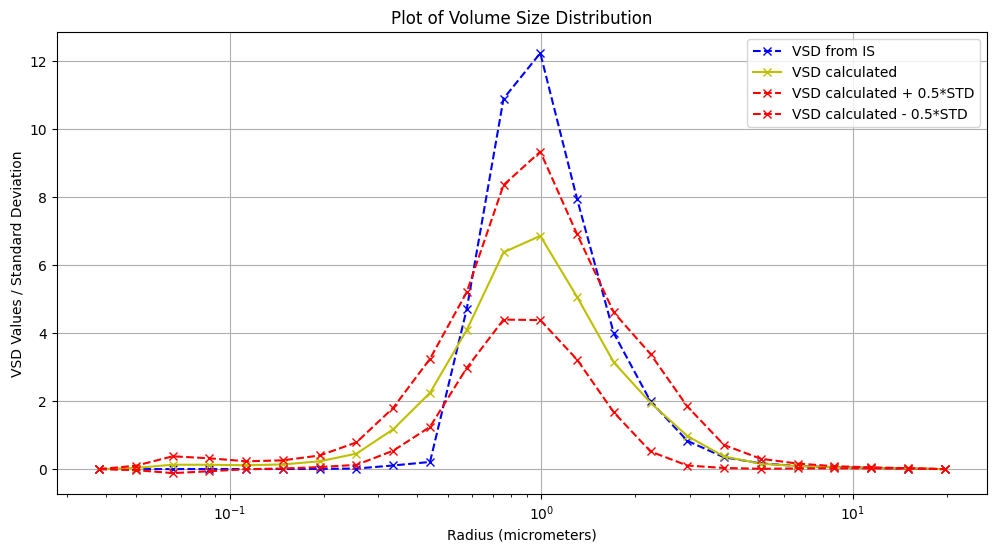

In [11]:
plt.figure(figsize=(12, 6))
# plt.plot(common_radii, vsd_std_dev_calculated, marker='o', linestyle='-', color='b', label='Standard Deviation of VSD')
plt.plot(common_radii, realization_01_vsd, marker='x', linestyle='--', color='b', label='VSD from IS')
plt.plot(common_radii, vsd_mean_calculated, marker='x', linestyle='-', color='y', label='VSD calculated')
plt.plot(common_radii, vsd_mean_plus_half, marker='x', linestyle='--', color='r', label='VSD calculated + 0.5*STD')
plt.plot(common_radii, vsd_mean_minus_half, marker='x', linestyle='--', color='r', label='VSD calculated - 0.5*STD')
plt.xscale('log')
plt.title('Plot of Volume Size Distribution')
plt.xlabel('Radius (micrometers)')
plt.ylabel('VSD Values / Standard Deviation')
plt.grid(True)
plt.legend()
plt.show()

#### Plot of the VSD from IS, the VSD from IS with error 0.1 and the VSD calculated

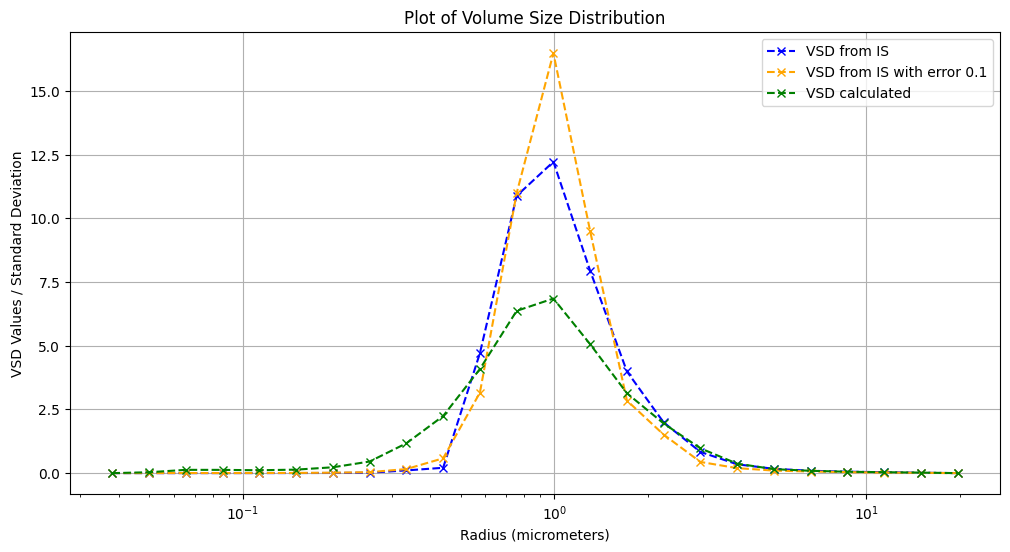

In [6]:
plt.figure(figsize=(12, 6))
# plt.plot(common_radii, vsd_std_dev_calculated, marker='o', linestyle='-', color='b', label='Standard Deviation of VSD')
plt.plot(common_radii, realization_01_vsd, marker='x', linestyle='--', color='b', label='VSD from IS')
plt.plot(common_radii, realization_00_vsd, marker='x', linestyle='--', color='orange', label='VSD from IS with error 0.1')
# plt.plot(common_radii, vsd_mean_plus_half, marker='x', linestyle='--', color='r', label='VSD calculated + 0.5*STD')
# plt.plot(common_radii, vsd_mean_minus_half, marker='x', linestyle='--', color='r', label='VSD calculated - 0.5*STD')
plt.plot(common_radii, vsd_mean_calculated, marker='x', linestyle='--', color='green', label='VSD calculated')
plt.xscale('log')
plt.title('Plot of Volume Size Distribution')
plt.xlabel('Radius (micrometers)')
plt.ylabel('VSD Values / Standard Deviation')
plt.grid(True)
plt.legend()
plt.show()

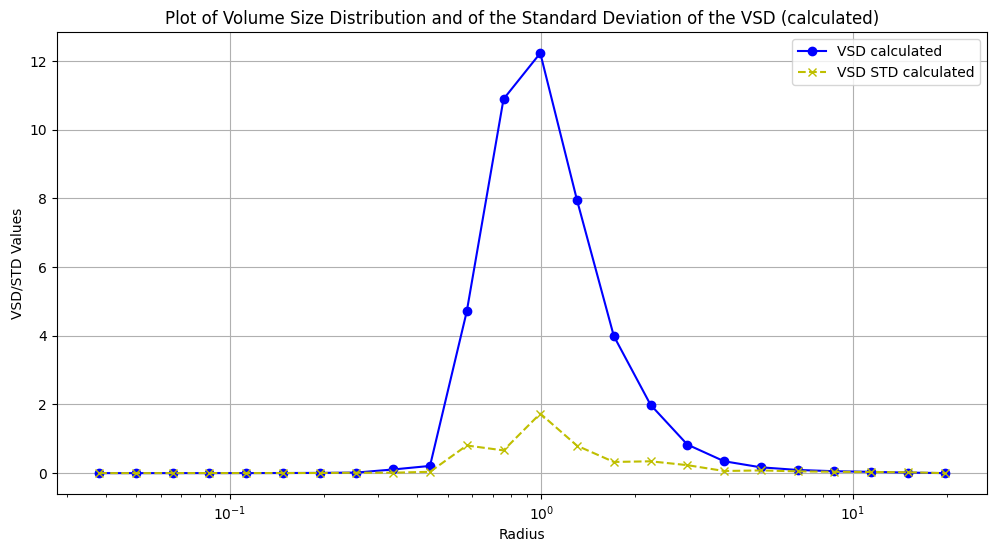

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(common_radii, realization_01_vsd, marker='o', linestyle='-', color='b', label='VSD calculated')
plt.plot(common_radii, realization_01_vsd_std, marker='x', linestyle='--', color='y', label='VSD STD calculated')
plt.xscale('log')
plt.title('Plot of Volume Size Distribution and of the Standard Deviation of the VSD (calculated)')
plt.xlabel('Radius')
plt.ylabel('VSD/STD Values')
plt.grid(True)
plt.legend()
plt.show()

#### Plot of the STD from the IS and the STD calculated (error bars)

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(common_radii,vsd_std_dev_calculated, marker='x', linestyle='-', color='b', label=' VSD STD calculated')
plt.plot(common_radii, realization_01_vsd_std, marker='x', linestyle='--', color='r', label='VSD STD from IS')
plt.xscale('log')
plt.title('Plot of the Standard Deviation of the Volume Size Distribution')
plt.xlabel('Radius')
plt.ylabel('STD Values')
plt.grid(True)
plt.legend()
plt.show()

#### Plot of VSD from IS with error bars from IS and error bars calculated 

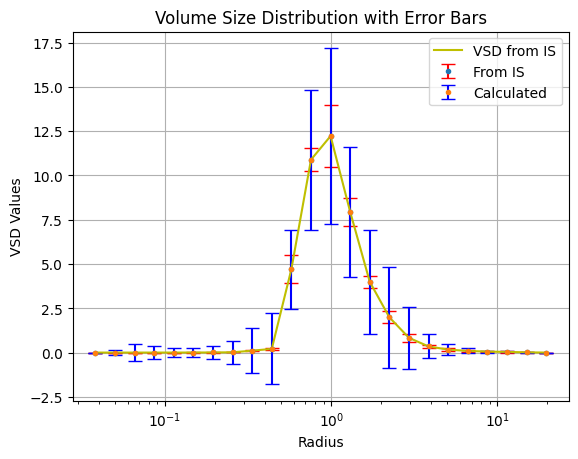

In [10]:
plt.errorbar(common_radii, realization_01_vsd, yerr=realization_01_vsd_std, fmt='.', capsize=5, capthick=1, ecolor='red', label='From IS')
plt.errorbar(common_radii, realization_01_vsd, yerr=vsd_std_dev_calculated, fmt='.', capsize=5, capthick=1, ecolor='blue', label='Calculated')
plt.plot(common_radii, realization_01_vsd, linestyle='-', color='y', label='VSD from IS')
plt.xscale('log')
plt.xlabel('Radius')
plt.ylabel('VSD Values')
plt.legend()
plt.title('Volume Size Distribution with Error Bars')
plt.grid(True)
plt.show()

#### Plot of the VSD calculated with error bars 

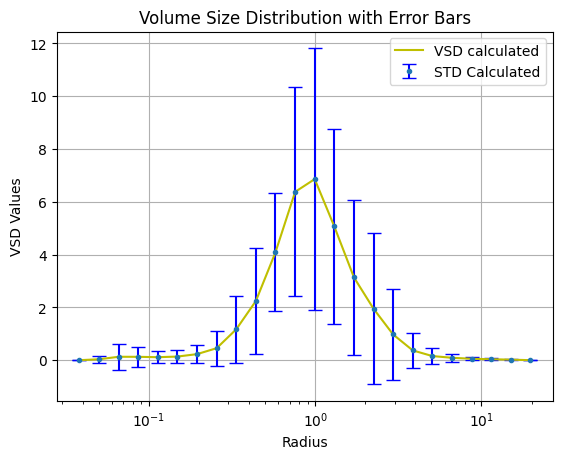

In [9]:
plt.errorbar(common_radii, vsd_mean_calculated, yerr=vsd_std_dev_calculated, fmt='.', capsize=5, capthick=1, ecolor='blue', label='STD Calculated')
plt.plot(common_radii, vsd_mean_calculated, linestyle='-', color='y', label='VSD calculated')
plt.xscale('log')
plt.xlabel('Radius')
plt.ylabel('VSD Values')
plt.legend()
plt.title('Volume Size Distribution with Error Bars')
plt.grid(True)
plt.show()

#### Plot of the VSD from IS with error bars from IS (BOREAL plot)

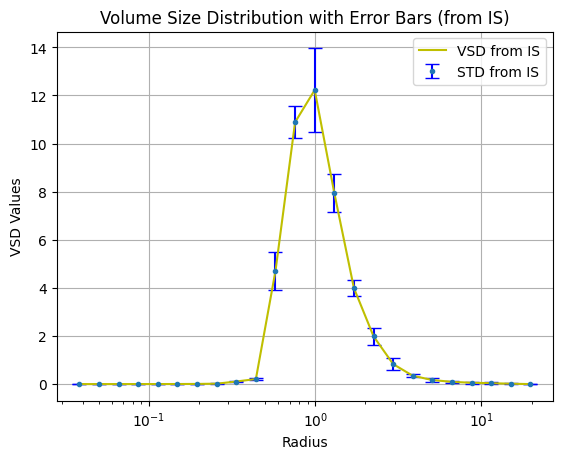

In [8]:
plt.errorbar(common_radii, realization_01_vsd, yerr=realization_01_vsd_std, fmt='.', capsize=5, capthick=1, ecolor='blue', label='STD from IS')
plt.plot(common_radii, realization_01_vsd, linestyle='-', color='y', label='VSD from IS')
plt.xscale('log')
plt.xlabel('Radius')
plt.ylabel('VSD Values')
plt.legend()
plt.title('Volume Size Distribution with Error Bars (from IS)')
plt.grid(True)
plt.show()

#### Plot of the VSD from IS and the VSD calculated

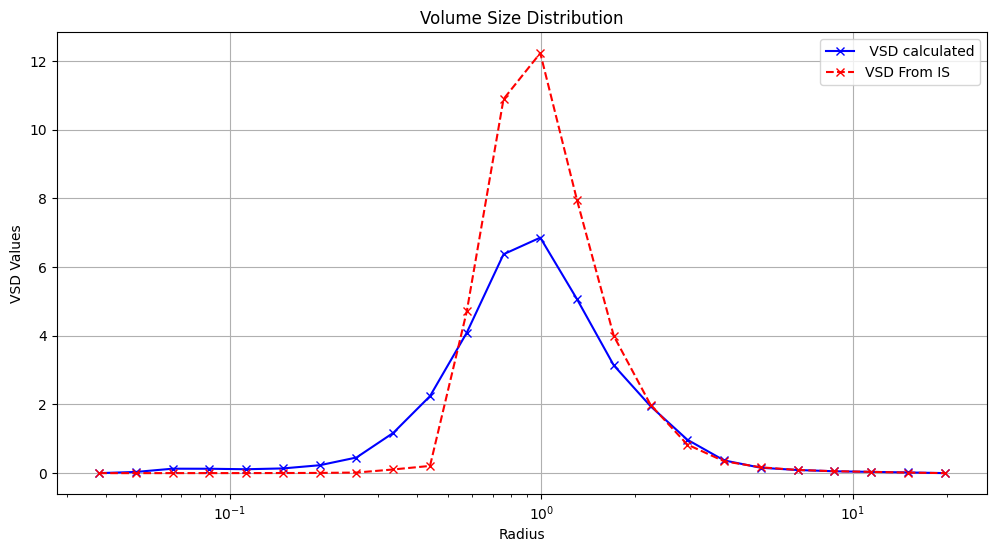

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(common_radii,vsd_mean_calculated, marker='x', linestyle='-', color='b', label=' VSD calculated')
plt.plot(common_radii, realization_01_vsd, marker='x', linestyle='--', color='r', label='VSD From IS')
plt.xscale('log')
plt.title('Volume Size Distribution')
plt.xlabel('Radius')
plt.ylabel('VSD Values')
plt.grid(True)
plt.legend()
plt.show()